
# Chaos(I)
	Exercise: Draw bifurcation diagram of a 1D discrete system of your choice, estimate positions of bifurcation points
 	and test convergence to the first Feigenbaum constant.

Feigenbaum constant:
	 $$\delta =\lim _{n\to \infty }{\frac {a_{n-1}-a_{n-2}}{a_{n}-a_{n-1}}}=4.669\,201\,609\,\ldots$$
	 where $a_n$ are discrete values of a at the nth period doubling

# Bifurcation diagram and period doubling	

Bifurcation at x =  2.9969063545150503
Bifurcation at x =  3.4516421404682274
Bifurcation at x =  3.545264214046823
Bifurcation at x =  3.5720133779264214
Estimated Feigenbaum constant:  4.857142857142844


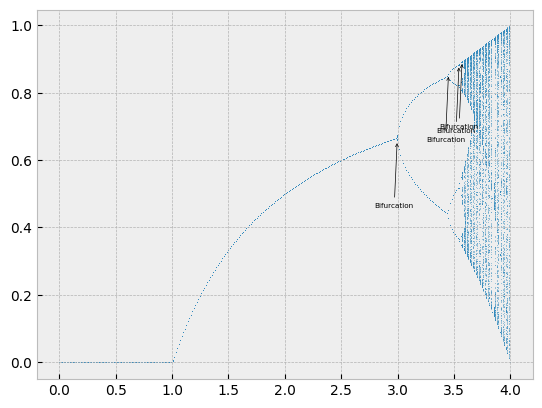

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def func(r, x): # Functions of various maps
    return r*x*(1-x) # Logistic map
    # return np.exp(-4.9*x*x) + r # Gauss map
    
Len_Graph = 300 # Number of x values
Iters_Before = 300 # Iterations of the map before values are stored
Values_Count = 300 # Number of y values stored for each x value
def scatterDraw():
    xar = np.zeros(Len_Graph*Values_Count) #Initializing x and y arrays with numpy
    yar = np.zeros(Len_Graph*Values_Count)
    cnt = 0
    for i in np.linspace(0.001,4,Len_Graph):
        x = 0.5
        for g in range (Iters_Before):
            x = func(i, x)
        for v in range (Values_Count):
            xar[v+cnt*Values_Count] = x
            yar[v+cnt*Values_Count] = i
            x = func(i, x)
        cnt+=1
    plt.scatter(yar, xar,s=0.02)
    return xar, yar

xar, yar = scatterDraw()
arrow_properties = dict(facecolor='red', edgecolor='black', arrowstyle='->') # Arrow meant to show period doubling
points =  [list (x) for x in zip (yar, xar)] # Creates a list of points [x,y]
points = points[int(len(points)/1.4):] # In the Logistic map we know, the first bifurcation occurs after this threshold
cnt = 0
i = 0
fei = []
def Cut_Array(points, min_x, min_y):
    # Using list comprehension to filter the points with x and y values greater than the specified minimums
    cut_points = [point for point in points if point[0] > min_x and point[1] > min_y]
    return cut_points
while(1):
    try:
        target_x = points[i][0]
    except IndexError: # If the end of the graph is reached
        break
    subarray = list(filter(lambda point: point[0] == target_x, points)) # Gets subarray at given x value
    max_y = max(subarray, key=lambda point: point[1])[1] # Find the maximum y value at a given x value
    min_y = min(subarray, key=lambda point: point[1])[1]
    if(cnt==4): # Max number of bifurcations to annotate
        break
    if(max_y-min_y> 0.001): # if the variance is large enough - estimate period doubling
        plt.annotate('Bifurcation', xy=(target_x, points[i][1]), xytext=(target_x - 0.2, points[i][1] - 0.2), # Displays an arrow
             arrowprops=arrow_properties, fontsize = 5.2)
        fei.append(target_x)
        print("Bifurcation at x = ", target_x)
        cnt+=1
        i=0
        points = Cut_Array(points, target_x, max_y) # Creates a subarray to loop through again
        continue
    i+=1
feigen_const = (fei[1]-fei[0])/(fei[2]-fei[1])
print("Estimated Feigenbaum constant: ", feigen_const)

# Chaos(II)
	Cvičení/úloha: 
	Zkuste odhadnout hodnotu (největšího) Lyapunovova exponentu pro různé režimy
	chování Lorenzova systému (vyjádřené různými hodnotami parametru r)
	(či pro jiný nelineární systém dle vlastní preference).
	Exercise: Estimate the values of the (largest) Lyapunov exponent for different regimes of Lorenz system’s dynamics 
	(pertaining to different values of parameter r) (alternatively, you may analyze a different chaotic system of your choice).

Largest Lyapunov exponent:
$$\lambda = \lim_{t \to \infty} \lim_{|\delta \mathbf{Z}_0| \to 0}
\frac{1}{t} \ln\frac{| \delta\mathbf{Z}(t)|}{|\delta \mathbf{Z}_0|}$$

# Largest Lyapunov exponent

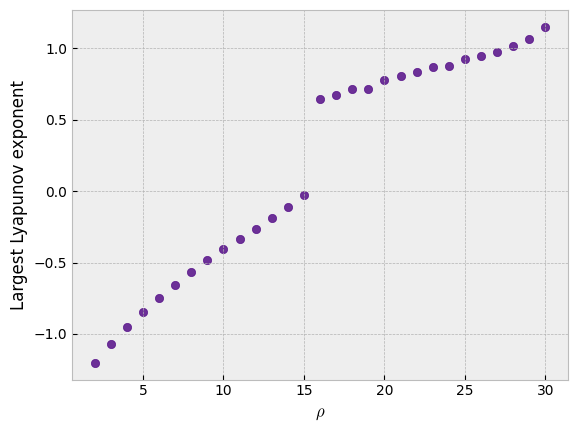

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('bmh')
def Lorenz_sys(points, sigma, rho, beta): # Function of Lorenz system
    x, y, z = points
    return np.array([sigma*(y-x), x*(rho -z)-y, x*y-beta*z])

def final_Lyap(n, rho, beta, sigma):
    dists = np.zeros(n) # Creates a list of distances between points
    dt = 0.01 # Timestep
    point_1 = [0,0.2,0.1]# Initialization
    for i in range(400): #Iterating, until the point is on the Attractor
        point_1+=Lorenz_sys(point_1, sigma, rho, beta)*dt
    point_2 = np.array(point_1)+ np.array([0,0,0.00001]) # Setting the second point very close to the first one
    init_dist = math.dist(point_1, point_2) # Calculating the distance
    def Readjust(point_to_adjust, secondpoint,  init): # Moving one point closer to the other on a straight line (Sprott)
        return np.array(secondpoint) + init*(np.array(point_to_adjust)-np.array(secondpoint))/math.dist(secondpoint, point_to_adjust)
    for i in range(n):
        point_1 += Lorenz_sys(point_1, sigma, rho, beta)*dt # Transformation
        point_2 += Lorenz_sys(point_2, sigma, rho, beta)*dt
        dists[i] = (math.dist(point_1, point_2)) # Appending distances to an array
        point_2 = Readjust(point_2, point_1, init_dist) # Moving the second point
    dists = np.log(dists/init_dist)
    Lyap_exp = (sum(dists))/len(dists)/dt
    if(False): # plots an arrow to the table value at rho = 28
        arrow_point = (28, 0.9056)
        arrow_properties = dict(facecolor='red', edgecolor='black', arrowstyle='->')
        plt.annotate('Table value', xy=(arrow_point[0], arrow_point[1]), xytext=(arrow_point[0] - 0.03, arrow_point[1] - 0.23),
                arrowprops=arrow_properties)
    plt.scatter(rho, Lyap_exp, color='indigo', alpha=0.8)
plt.xlabel(r"$\rho$")
plt.ylabel('Largest Lyapunov exponent')
for r in range(2,31):
    final_Lyap(12000,r,  8/3, 10 )

# Chaos(III)
    Cvičení/Exercises: 

    •	What is the fractal dimension of Menger’s sponge?

    •	What is the fractal dimension of Rössler system’s attractor?


<!-- Types of used fractal dimensions:

    Correlation dimension:
$$ D_{2}=\lim _{M\to \infty }\lim _{\varepsilon \to 0}{\frac {\log(g_{\varepsilon }/M^{2})}{\log \varepsilon }}$$
    Minkowski dimension:
$$ \dim _{\text{box}}(S):=\lim _{\varepsilon \to 0}{\frac {\log N(\varepsilon )}{\log(1/\varepsilon )}}$$ -->

# Menger sponge
Based on Minkowski dimension, we can calculate the dimension of the Menger sponge. We know, that $N(\varepsilon ) = 20$, because this is the number of boxes of the smallest size needed to contain the whole sponge. 
Also,  $\varepsilon = \frac{1}{3}$, because $\varepsilon$ is the side length of the box needed to cover any point. Therefore the Minkowski dimension of the Menger sponge is $$dim(Menger) = \frac{\log(20)}{\log(\frac{1}{3})} = \log_3(20) \approx 2.72683$$
(We would get the same number with the Haussdorf dimension - fulfills the open set condition)
# Rossler system

This system can be defined by using the Correlation dimension. 

Based on the definition, the optimal solution would be to use a log-log-graph of the Correlation integral based on some $\varepsilon$, with $lim (\varepsilon) \to 0$. We will use the Correlation sum, as it is much easier to compute accurately, and it approximates the integral to a good degree. 



Estimated Correlation dimension:  1.5044016815202506


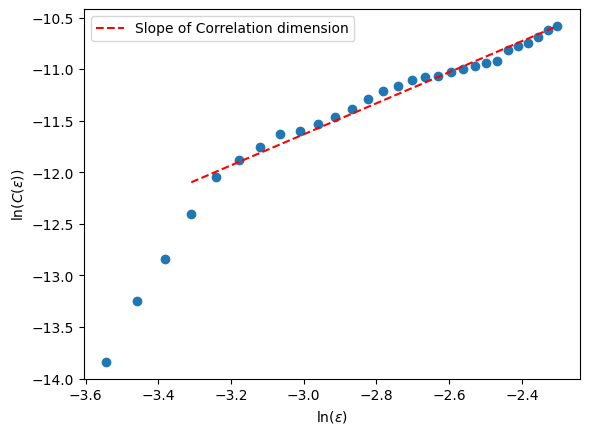

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import pdist
def Lorenz_sys(points, sigma, rho, beta):
    x, y, z = points
    return np.array([sigma*(y-x), x*(rho -z)-y, x*y-beta*z])
def Rossler_sys(points, sigma, rho, beta):
    x, y, z = points
    return np.array([-(y+z), x+ sigma*y, rho+z*(x-beta)])

def Iterate(a,type, timer):
    """Iterates the system. a is the starting point, type is either Rossler, or Lorenz, and timer is the number of iterations
    """
    dt = 0.01
    points = a
    data = []
    match type:
        case "Lorenz":
            f = Lorenz_sys
            rho, beta, sigma = 28,  8/3, 10 #values for Lorenz system
        case "Rossler":
            f = Rossler_sys
            rho,sigma, beta = 0.2,  0.2, 5.7 #values for Rossler system
    for t in np.linspace(0.001, 1, timer):
        points += f(points, sigma, rho, beta)*dt
        data.append([points[0],points[1],points[2]])
    return data   

data = Iterate([1,0.5,0],"Lorenz", 4000) #Gathering data of 4000 iterations
data = data[int(0.2*len(data)):] #Necessity of points being on the attractor
N = len(data)
distances = pdist(data) #List of all distances between points

def Correlation_Sum():
    """Calculates the Correlation Sum based on the supplied list of distances between points."""
    arx = []
    ary = []
    for i in np.linspace(0.001,0.1,40): #For larger dataset, smaller epsilon is needed
        data_eps = [x for x in distances if x<=i]
        Corr_sum = len(data_eps)/(N*N) #Calculating the correlation sum
        if(Corr_sum!=0): #Has to be non-empty
            arx.append(i)
            ary.append(Corr_sum)
    arx = np.log(np.array(arx))
    ary = np.log(np.array(ary))
    plt.scatter(arx, ary)
    return arx, ary
arx, ary = Correlation_Sum()
arx = np.delete(arx, [0,1,2])
ary = np.delete(ary, [0,1,2]) # Calculating only for the linear model
res = scipy.stats.linregress(arx, ary) # Getting the linear regression model
print("Estimated Correlation dimension: ", res.slope)
plt.plot(arx, res.intercept + res.slope*np.array(arx), 'r', label='Slope of Correlation dimension', ls = '--')
plt.xlabel(r"$\ln(\varepsilon)$")
plt.ylabel(r"$\ln(C(\varepsilon))$")
plt.legend()
plt.show()

# Chaos(V)
	Další čtení na toto téma. 
	(a zároveň domácí úloha – prostudujte a zamyslete se nad tím,
 	zda jsou uváděné vlastnosti v souladu s charakteristikami dosud prezentovaných chaotických systémů)


Presented systems:
1) Bifurcation diagram 1D $\to$(Logistic map, Gauss map)
2) Bifurcation diagram 2D $\to$(Henon map)
3) Lorenz system (Rossler)
<!-- 4) Fractals $\to$ (Menger cube, Mandelbrot set, Sierpinski triangle,...) (NOT DEPENDENT ON INITIAL CONDITIONS - DEAL WITH LATER) -->
###	Devany’s definition of chaos:

##### 1) Sensitive dependence on initial conditions
1) Logistic map (chaotic for $r>3$ $\to$ sensitive, for $lim (\varepsilon) \to 0$, $r$ and $r+\varepsilon$ result in different possible states ) 
2) This is implied from the largest Lyapunov exponent, which for the given values $a=1.4$ and $b=0.3$ is positive. 
3) I have a graphical representation in the Lorenz_system file. Again, this is implied from the largest Lyapunov exponent for usually used values $\beta$,$\sigma$ and $\rho$. (In the previous homework, we have seen, that it fulfills this condition with $\rho > 15$). Conditions for the Rossler system are similar.
<!-- 4) Not dependent on initial conditions -->

##### 2) Topological transitivity
	A dynamical system is topologically transitive if, under the system's evolution or iteration, there exists at least one point whose orbit can visit any open set in the phase space. In other words, there is a point whose trajectory comes arbitrarily close to any region in the phase space, and the points within that region can be reached by sufficiently iterating the system.

	In other words, the phase space of a chaotic system cannot be composed from mutually isolated parts.
1) Logistic map(if we set the starting point value from $x \in [0;1]$, the bifurcation diagram fills the phase space. Therefore each point from the phase space intersects any open set - the same case is with the Gauss map. 
2) From the second point, the phase space of the Henon system is continuous and is composed only from connected parts.
3) During the calculation of the Correlation dimension, we have counted each time, some two points of the trajectory have been closer than some epsilon. Based on this approach, the topological transitivity would imply, that for each point there exists another one, whose trajectory would be aritrarily close to the location of the first point.
Also, Lorenz system is ergodic - which is a special case of topological transitivity
<!-- 4)  -->
##### 3) Dense periodic orbits
	If there is a periodic orbit, then it is dense in the phase space.

	Dense means that given any point in the phase space, there is a periodic point (a point in a periodic orbit) arbitrarily close to it.

	For any point of an attractor, there is a periodic orbit arbitrarily close to it.
1) For large enough values of $r$ , the system visits every point in the phase space infinitely often - because of the period doubling cascade.
2) 
3) Since these systems have infinite periodic orbits, then each must be dense in the phase space. Since it is topologically transitive, this holds for each orbit (and therefore point) in the phase system
<!-- 4)  -->

	

# Chaos (VI)
	Find a periodic orbit of the Henon system in chaotic regime a = 1.4, b = 0.3, then develop and test a procedure to stabilize the systems evolution to follow this orbit

	Henon map:
$${\begin{cases}x_{n+1}=1-ax_{n}^{2}+y_{n}\\y_{n+1}=bx_{n}.\end{cases}}$$

# Henon system

we know, that $$x_t = 1-(a+\Delta a)x_{t-1}^2 + y_{t-1} $$
$$y_t = (b+\Delta b)x_{t-1} $$

if we keep $y$ at a constant value, we get an equation involving $\Delta a$:
$$x_{n+1}-x_{n+1}^p \approx -\Delta a(x_n^p)^2 - (x_n-x_n^p)(2ax_n^p) $$
We require this value to be close to zero, so the parameter $\Delta a$ needs to be changed via:
$$\Delta a = \frac{-2a(x_n-x_n^p)}{x_n^p} $$

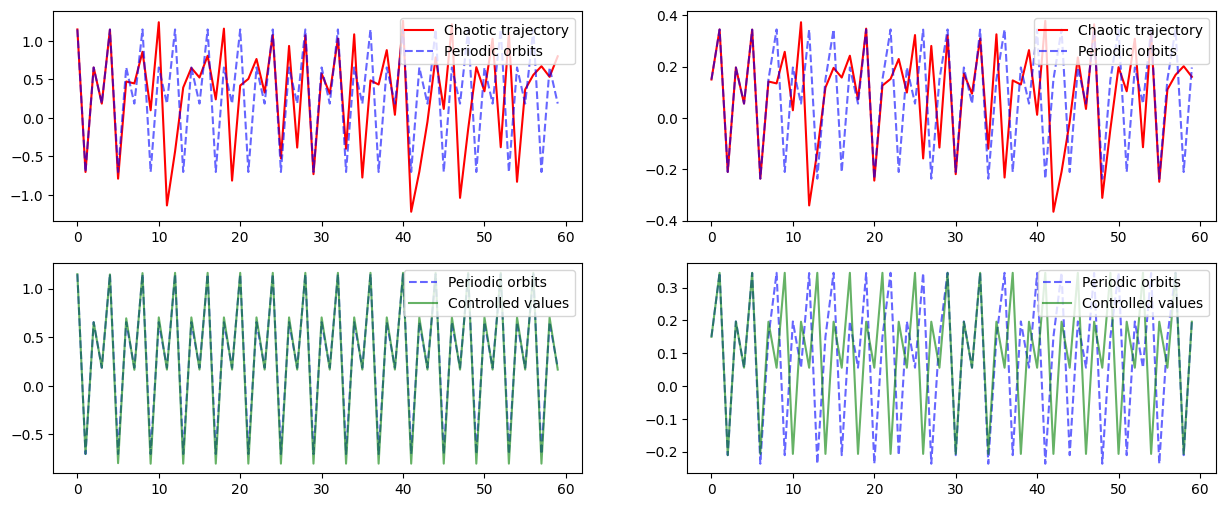

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def func(a,b,x, y): # Henon system function
    return 1-a*x*x+y, b*x
def period(x, y, cnt): # Returns the value of the cnth period 
    cx = cnt
    cy = cnt
    xi = [1.15, -0.7014999999999997, 0.6560568500000006, 0.1869751733953076] # First few values of the chaotic system
    yi = [0.15, 0.345, -0.2104499999999999, 0.19681705500000016, 0.05609255201859228, 0.3443620360041938, -0.23656988965220604]
    cx%=len(xi)
    cy%=len(yi)
    return xi[cx], yi[cy]

a,b = 1.4, 0.3 # Constant values
def Plotting_Henon(): # Gathering the dataset
    for i in np.linspace(0,4, 300): 
        if (i==0): continue
        x = 0.5
        y = 0.5
        for g in range (100):
            x, y = func(a,b, x,y)
        for v in range (200):
            xar.append(x)
            yar.append(y)
            x, y = func(a,b,x,y)
fig, ax = plt.subplots(2,2, figsize = (15,6)) # Initializing diagrams
number_Of_Trajectories = 60
def Chaotic_Trajectory(): # Plotting the chaotic trajectory
    x = 0.5
    y = 0.5
    xar = []
    yar = []
    for i in np.linspace(0,4, number_Of_Trajectories):
        x, y = func(a,b, x,y)
        xar.append(x)
        yar.append(y)
    ax[0][0].plot(xar, color = 'r', label = "Chaotic trajectory")
    ax[0][1].plot(yar, color = 'r', label = "Chaotic trajectory")
    # print(xar[:15])
    # print(yar[:25])
Chaotic_Trajectory()
def Periodic_Trajectory(): # Plotting the periodic trajectory with which we will later peturb the chaotic one
    xar = []
    yar = []
    x = 0.5
    y = 0.5
    cnt = 0
    for i in np.linspace(0,4,number_Of_Trajectories):
        x, y = period(x, y, cnt)
        xar.append(x)
        yar.append(y)
        cnt+=1
    ax[0][0].plot(xar, alpha = 0.6, label = "Periodic orbits", color = 'blue', ls = 'dashed')
    ax[0][1].plot(yar, alpha = 0.6, label = "Periodic orbits", color = 'blue', ls = 'dashed')
    ax[1][0].plot(xar, alpha = 0.6, label = "Periodic orbits", color = 'blue', ls = 'dashed')
    ax[1][1].plot(yar, alpha = 0.6, label = "Periodic orbits", color = 'blue', ls = 'dashed')
    # print(xar[:15])
    # print(yar[:15])
Periodic_Trajectory()

def Chaos_Control(): # Peturbing function
    xar = []
    yar = []
    periodx = 1.15 #period
    periody = 0.15
    x = 1.15
    y = 0.15
    cnt = 0
    da = 0
    db = 0
    for i in range(number_Of_Trajectories):
        xar.append(x)
        yar.append(y)
        periodx, periody = period(x, y, cnt)
        db = 0 
        da = (-2*a)*(x-periodx)/(periodx) #Keeping y constant
        x, y = func(a + da ,b + db, x, y) #Actually peturbing the function with new parameter da
        cnt+=1
    ax[1][0].plot(xar, alpha = 0.6, color = 'green', label = "Controlled values") # This is with keeping y constant
    xar = []
    yar = []
    periodx = 1.15 #period
    periody = 0.15
    x = 1.15
    y = 0.15
    cnt = 0
    da = 0
    db = 0
    for i in range(number_Of_Trajectories):
        xar.append(x)
        yar.append(y)
        periodx, periody = period(x, y, cnt)
        db = -b*(x-periodx)/(periodx)
        da = (-2*a)*(x-periodx)/(periodx) #Keeping y constant
        x, y = func(a + da ,b + db, x, y)
        cnt+=1

    ax[1][1].plot(yar, alpha = 0.6, color = 'green', label = "Controlled values") # This should be with keeping x constant
Chaos_Control()

ax[0][0].legend(loc="upper right") # Adding legends to graphs
ax[0][1].legend(loc="upper right")
ax[1][0].legend(loc="upper right")
ax[1][1].legend(loc="upper right")


# Chaos (VII)
	Compare the correlation dimension estimate obtained from the time series of the variable X of the Lorenz system 
	and based on its surrogate version

	Correlation dimension:
$$ D_{2}=\lim _{M\to \infty }\lim _{\varepsilon \to 0}{\frac {\log(g_{\varepsilon }/M^{2})}{\log \varepsilon }}$$

	Surrogate version:
	

	Data file, consistent with some null hypothesis (Monte Carlo for ex. ), and then compare it based on some adequate statistic - our case is the correlation dimenstion. If the values are different enough - the null hypothesis is rejected. 

	Randomization of the phasis of Fourier spectrum:
		First, we do a Fourier transformation and represent the coefficients in a polar shape - amplitude, and phase
		Then we Randomize the phase in range from 0 to 2pi
		Then we do a reverse Fourier transform

Estimated Correlation dimension:  0.9251702090525659
Estimated Correlation dimension:  1.014445845396322


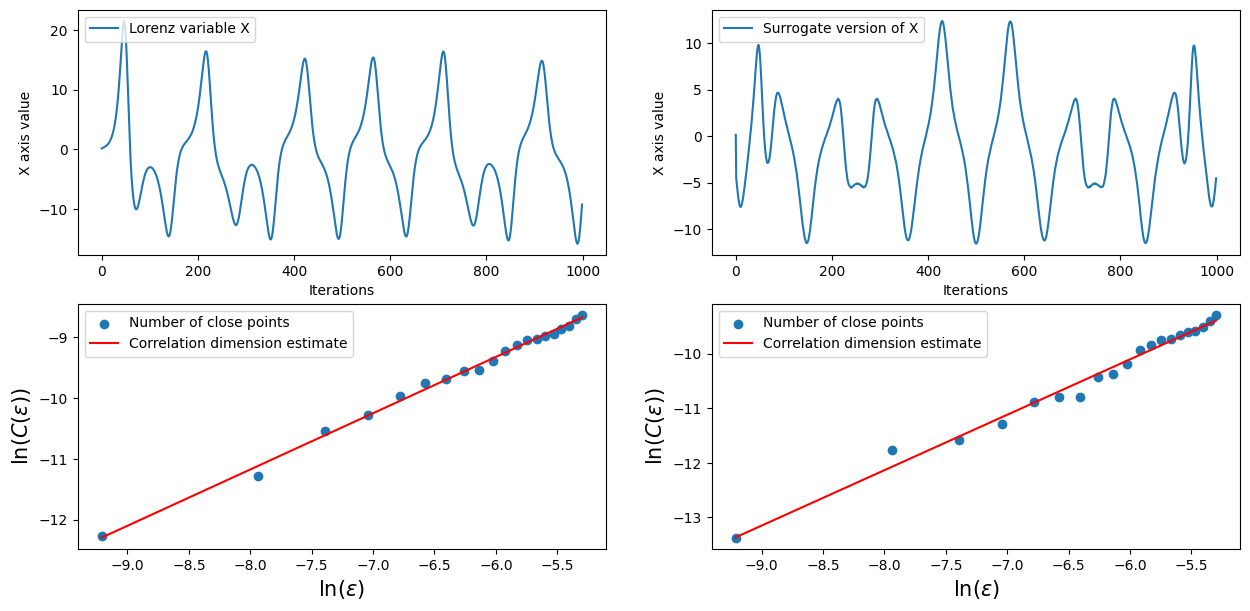

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.fft import fft, ifft
import random
max_time = 9000
starting_point_a, starting_point_b = [0.1,0.5,0.1],[0.1,0.51,0.1] #Points distance before iterating
def Lorenz_sys(points, sigma, rho, beta):
    x, y, z = points
    return np.array([sigma*(y-x), x*(rho -z)-y, x*y-beta*z])
def Rossler_sys(points, sigma, rho, beta):
    x, y, z = points
    return np.array([-(y+z), x+ sigma*y, rho+z*(x-beta)])
fig, ax = plt.subplots(2,2, figsize = (15,7))
def Iterate(a,type, timer):
    """Iterates the system. a is the starting point, type is either Rossler, or Lorenz, and timer is the number of iterations
    """
    dt = 0.01
    points = a
    data = []
    match type:
        case "Lorenz":
            f = Lorenz_sys
            rho, beta, sigma = 28,  8/3, 10 #values for Lorenz system
        case "Rossler":
            f = Rossler_sys
            rho,sigma, beta = 0.2,  0.2, 5.7 #values for Rossler system
    for t in np.linspace(0.001, 1, timer):
        points += f(points, sigma, rho, beta)*dt
        data.append([points[0],points[1],points[2]])
    return data   
data = Iterate(starting_point_a,"Lorenz", 1000)
data = np.array(data)
data = [item[0] for item in data] # Getting only the x value using list comprehension

def Plotting_sys(data, cnt):
    if(cnt==0):
        ax[0][cnt].plot(data,label = "Lorenz variable X")
    else:
        ax[0][cnt].plot(data,label = "Surrogate version of X")
Plotting_sys(data, 0)

def Corrdim(data,cnt): # Calculates the correlation dimension of a dataset
    data = data[int(0.2*len(data)):] #chceme, aby nase body byly na atraktoru
    N = len(data)
    def List_of_dists(points):
        distances=[]
        n = len(points)
        for i in range(n):
            for j in range(i + 1, n):
                distance = abs(points[i] - points[j])
                distances.append(distance)
        return distances
    distances = List_of_dists(data)
    arx = []
    ary = []
    for i in np.linspace(0.0001,0.005,20): #Getting the number of close points based on i
        data_eps = [x for x in distances if x<=i]
        Corr_sum = len(data_eps)/(N*N)
        if(Corr_sum!=0):
            arx.append(i)
            ary.append(Corr_sum)
    arx = np.log(np.array(arx))
    ary = np.log(np.array(ary))
    ax[1][cnt].scatter(arx, ary, label = "Number of close points")
    res = sc.stats.linregress(arx, ary)
    print("Estimated Correlation dimension: ", res.slope)
    ax[1][cnt].plot(arx, res.intercept + res.slope*np.array(arx), 'r', label='Correlation dimension estimate')

Corrdim(data,0)
data = np.array(data,dtype = 'complex_')
def F_Transform(data): # This function does the fft phase randomization
    data = fft(data)
    idata = [random.uniform(0, np.pi) for _ in range(len(data))]
    data = np.real(data)+ 1j* np.array(idata)
    data = ifft(data)
    return data
data = F_Transform(data)
Plotting_sys(data, 1)
Corrdim(data,1)


ax[0][0].legend(loc="upper left")
ax[0][1].legend(loc="upper left")
ax[1][0].legend(loc="upper left")
ax[1][1].legend(loc="upper left")

ax[0][0].set_xlabel("Iterations", fontsize=10)
ax[0][1].set_xlabel("Iterations", fontsize=10)
ax[0][0].set_ylabel("X axis value", fontsize=10)
ax[0][1].set_ylabel("X axis value", fontsize=10)
ax[1][0].set_xlabel(r"$\ln(\varepsilon)$", fontsize=15)
ax[1][1].set_xlabel(r"$\ln(\varepsilon)$", fontsize=15)
ax[1][0].set_ylabel(r"$\ln(C(\varepsilon))$", fontsize=15)
ax[1][1].set_ylabel(r"$\ln(C(\varepsilon))$", fontsize=15)
plt.show()